# Mean,Median, Mode by Class name

#import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Data from file and make backup file

In [ ]:
df = pd.read_csv('train.csv')
df_backup = df.copy()

# Summary of data

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
df.isnull().sum().sum()

7829

<Axes: >

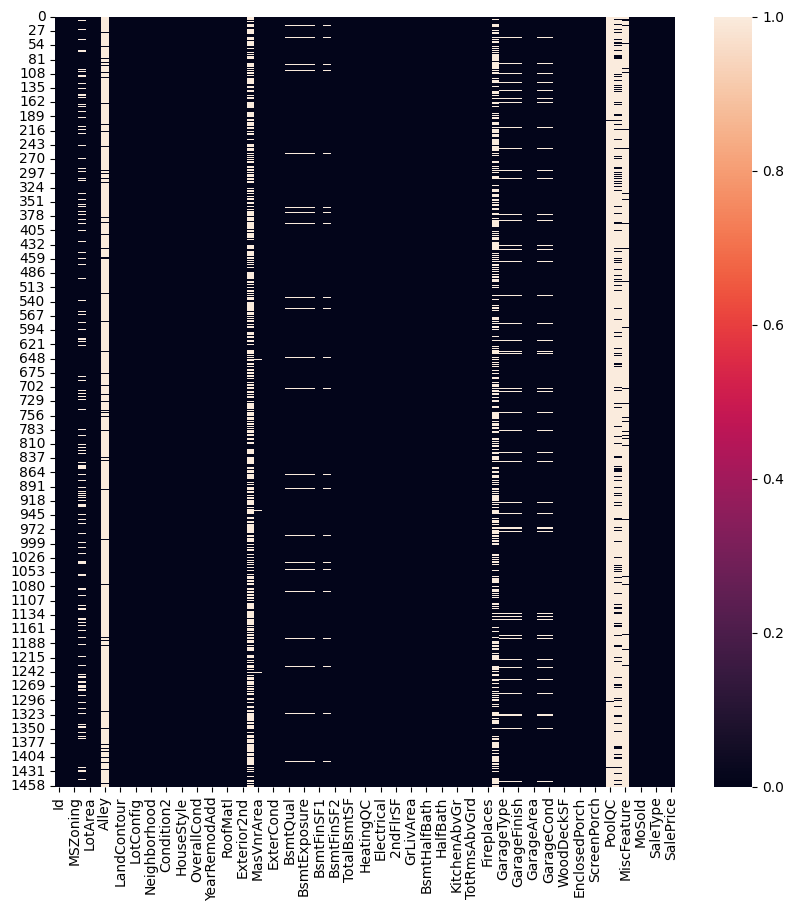

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

# See % of missing values

In [ ]:
df_missing_percen = df.isnull().sum()/df.shape[0]*100
df_missing_percen

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


# Get column who has more than 20% missing values

In [ ]:
df_missing_percen > 20

,0
Id,False
MSSubClass,False
MSZoning,False
LotFrontage,False
LotArea,False
...,...
MoSold,False
YrSold,False
SaleType,False
SaleCondition,False


In [ ]:
df_column_20 = df_missing_percen[df_missing_percen > 20].keys()
df_column_20

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

# Drop Column whose have 20% or more missing values

In [ ]:
df_drop_col = df.drop(df_column_20, axis=1)
df_drop_col.shape

(1460, 75)

<Axes: >

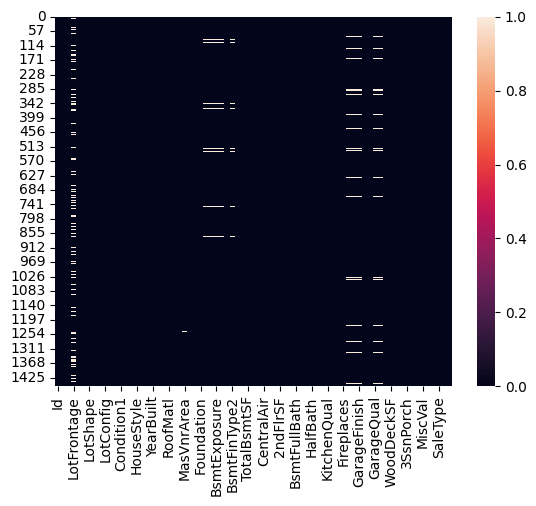

In [ ]:
sns.heatmap(df_drop_col.isnull())

# Mean, Median, Mode by Categorical data

# Find the numerical Data

In [ ]:
df_num = df_drop_col.select_dtypes(include=np.number)
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
x = df_num.isnull().any()
x

,0
Id,False
MSSubClass,False
LotFrontage,True
LotArea,False
OverallQual,False
OverallCond,False
YearBuilt,False
YearRemodAdd,False
MasVnrArea,True
BsmtFinSF1,False


In [ ]:
df_num_null = df_num.columns[x]
df_num_null

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [ ]:
df_num[df_num_null]

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


# Mean Calculate

In [ ]:
df_mean = df_num[df_num_null].mean()
df_mean

,0
LotFrontage,70.049958
MasVnrArea,103.685262
GarageYrBlt,1978.506164


In [ ]:
cat =df['LotConfig'].unique()
cat

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

# Method 1: Use  Groupby for doing separate each class



```
1. Do some group
2. Take 1 group with specific column
3. apply mean for each group
```



In [192]:
# check it for one gropu (Practice)
df.groupby('LotConfig')

x = df_drop_col.groupby('LotConfig')
x = x.get_group('Corner')[df_num_null]
x.replace(np.nan, x.mean(), inplace=True)

x.isnull().sum().sum()

0

In [ ]:

# Create an empty DataFrame to store the processed groups
merged_df = pd.DataFrame()

# Group by 'LotConfig' and process each group
for key, group in df.groupby('LotConfig'):
    print(f"Processing group: {key}")

    # Replace NaN values in the numerical columns with the group's mean
    group_filled = group.copy()
    group_filled[df_num_null] = group_filled[df_num_null].apply(lambda col: col.fillna(col.mean()))

    # Append the processed group to the merged DataFrame
    merged_df = pd.concat([merged_df, group_filled], axis=0)

# Reset the index of the merged DataFrame
merged_df.reset_index(drop=True, inplace=True)

# Print the merged DataFrame
mean_by_cat = merged_df.copy()
mean_by_cat.head()


Processing group: Corner
Processing group: CulDSac
Processing group: FR2
Processing group: FR3
Processing group: Inside


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
1,8,60,RL,84.039801,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
2,10,190,RL,50.000000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
3,15,20,RL,84.039801,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
4,16,45,RM,51.000000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000


# Mean Data Visualization

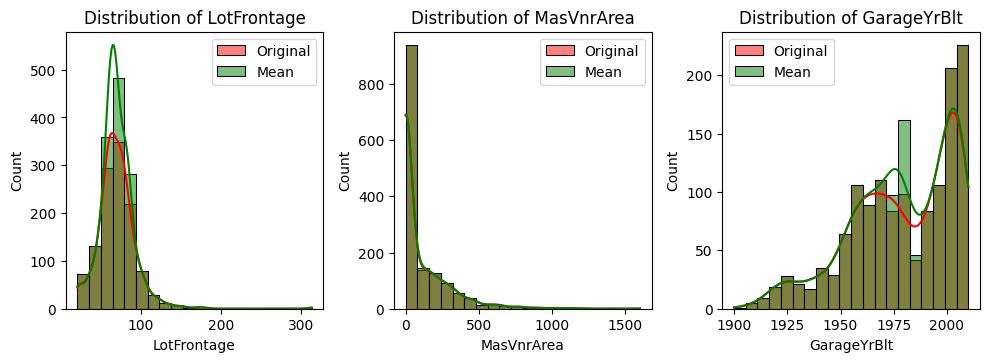

In [ ]:

plt.figure(figsize=(10, 10))

# Loop through each column with null values
for i, col in enumerate(df_num_null):
    plt.subplot(3, 3, i+1)  # Create subplot in a 3x3 grid

    sns.histplot(df_drop_col[col], color='red', bins=20, kde=True, label='Original')  # Red distribution
    sns.histplot(mean_by_cat[col], color='green', bins=20, kde=True, label='Mean')  # Green distribution

    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()

#Method 2: Use Loc method and For loop

In [ ]:
df_drop_col
df_num_null
cat

df_drop_col_cpy = df_drop_col.copy()
df_num_null_cpy = df_num_null.copy()
cat_cpy = cat.copy()

In [ ]:
x1 = df_drop_col_cpy[df_drop_col_cpy.loc[:, 'LotConfig'] == 'Corner']['LotFrontage']
y1 = x1.replace(np.nan, x1.mean())
y1

,LotFrontage
3,60.000000
7,84.039801
9,50.000000
14,84.039801
15,51.000000
...,...
1407,84.039801
1413,88.000000
1420,90.000000
1428,60.000000


# Replace a single column

In [ ]:
for catx in cat_cpy:
  x1 = df_drop_col_cpy[df_drop_col_cpy.loc[:, 'LotConfig'] == catx]['LotFrontage']
  y1 = x1.replace(np.nan, x1.mean())
  df_drop_col_cpy.update(y1)

df_drop_col_cpy.isnull().sum().sum()

601

# Replace whole column and key

In [193]:
# key_col = ['LotConfig', 'Exterior2nd', 'KitchenQual']
key_col = ['LotConfig', 'MasVnrType', 'GarageType']
df_copy_2 = df.copy()

for key, col in zip(key_col, df_num_null.tolist()):

  for catx in df_copy_2[key].unique():

     x1 = df_copy_2[df_copy_2.loc[:, key] == catx][col]
     y1 = x1.replace(np.nan, x1.median())
     df_copy_2.update(y1)

df_copy_2[df_num_null].isnull().sum()

,0
LotFrontage,0
MasVnrArea,8
GarageYrBlt,81


In [194]:
df[df_num_null].isnull().sum()

,0
LotFrontage,259
MasVnrArea,8
GarageYrBlt,81


# Replace another Columns by another keys

In [195]:
key_col = ['LotConfig', 'Exterior2nd', 'KitchenQual']
# key_col = ['LotConfig', 'MasVnrType', 'GarageType']
df_copy_3 = df.copy()

for key, col in zip(key_col, df_num_null.tolist()):

  for catx in df_copy_3[key].unique():

     x1 = df_copy_3[df_copy_3.loc[:, key] == catx][col]
     y1 = x1.replace(np.nan, x1.median())
     df_copy_3.update(y1)

df_copy_3[df_num_null].isnull().sum()

median_by_cat = df_copy_3.copy()
median_by_cat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Median data Visulization

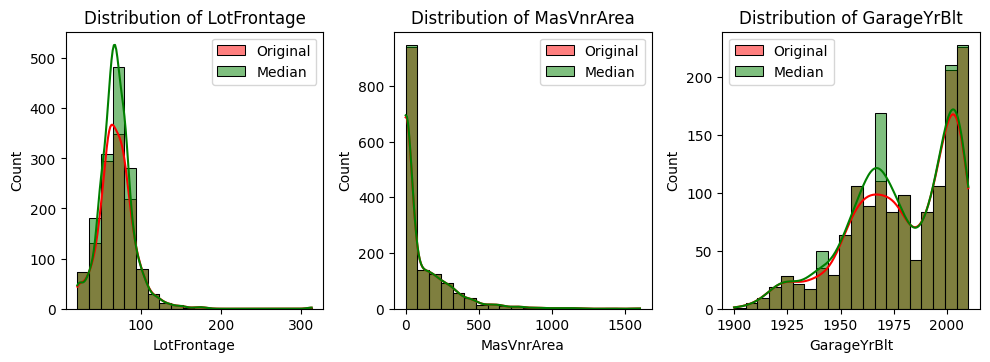

In [196]:
plt.figure(figsize=(10, 10))

# Loop through each column with null values
for i, col in enumerate(df_num_null):
    plt.subplot(3, 3, i+1)  # Create subplot in a 3x3 grid

    sns.histplot(df_drop_col[col], color='red', bins=20, kde=True, label='Original')  # Red distribution
    sns.histplot(median_by_cat[col], color='green', bins=20, kde=True, label='Median')  # Green distribution

    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()

# Original, Mean, Median data visualization

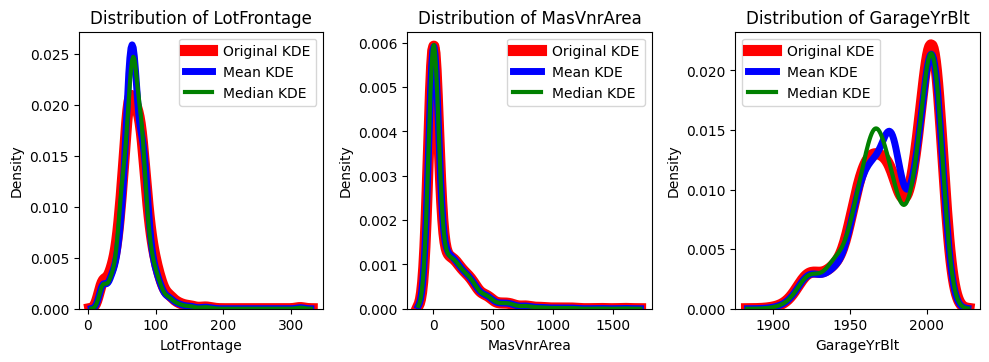

In [197]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(df_num_null):
    plt.subplot(3, 3, i+1)

    # Overlay histograms
    # sns.histplot(df_fill_median[col], color='red', alpha=0.4, bins=20, label='Median')
    # sns.histplot(drop_col[col], color='blue', alpha=0.4, bins=20, label='Original')

    # Overlay KDE plots
    sns.kdeplot(df_drop_col[col], linewidth=8, color='red', label='Original KDE')

    sns.kdeplot(mean_by_cat[col], linewidth=5, color='blue', label='Mean KDE')
    sns.kdeplot(median_by_cat[col], linewidth=3, color='green', label='Median KDE')

    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()